In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

os.chdir('C:\\Users\\Mutum\\Courses\\Udacity\\AI programming with Python\\data')

## Scatterplots and Correlation

In [3]:
fuel_eco = pd.read_csv("fuel-econ.csv")
fuel_eco.shape

(3929, 20)

In [4]:
fuel_eco.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

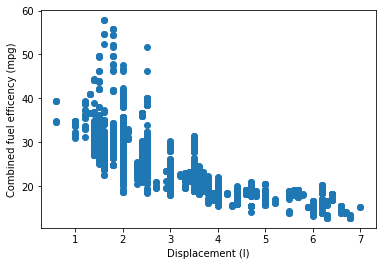

In [5]:
plt.scatter(data=fuel_eco,x="displ",y="comb")
plt.xlabel("Displacement (l)")
plt.ylabel("Combined fuel efficency (mpg)");
# negative correlation

***with Seaborn***

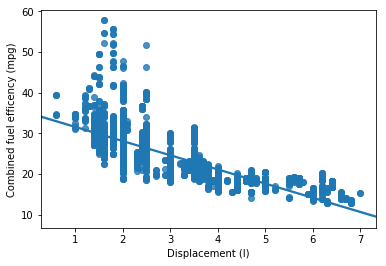

In [6]:
sns.regplot(data=fuel_eco,x="displ",y="comb")
plt.xlabel("Displacement (l)")
plt.ylabel("Combined fuel efficency (mpg)");
# negative correlation

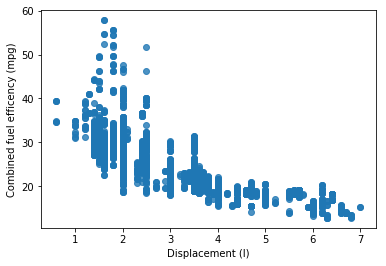

In [7]:
sns.regplot(data=fuel_eco,x="displ",y="comb",fit_reg=False)
plt.xlabel("Displacement (l)")
plt.ylabel("Combined fuel efficency (mpg)");
# negative correlation

#### Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

The below plot makes more clear and informative than the previous above plot!!

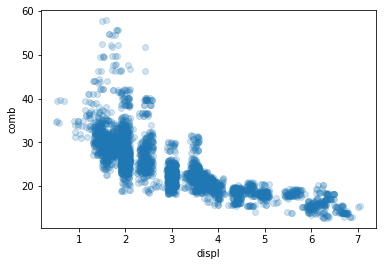

In [8]:
sns.regplot(data=fuel_eco,x="displ",y="comb",fit_reg=False,
           x_jitter=0.1,y_jitter=0.1,scatter_kws={"alpha":1/5});

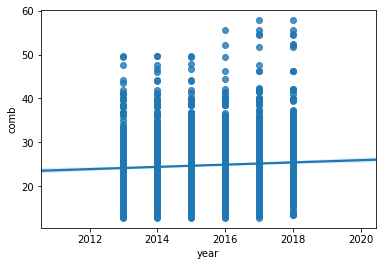

In [9]:
# lets take another discrete variable Year

sns.regplot(x="year",y="comb",data=fuel_eco,fit_reg=True);

regression line suggest of upward trends yet this is not clear from the above figure, yet below makes sense and if not at all satistified, we`ll explore more type. Wait!!

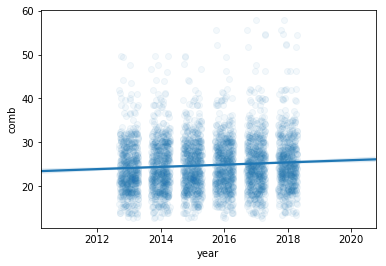

In [10]:
sns.regplot(x="year",y="comb",data=fuel_eco,fit_reg=True,
           x_jitter=0.3,scatter_kws={"alpha":1/20});

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

### Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function.

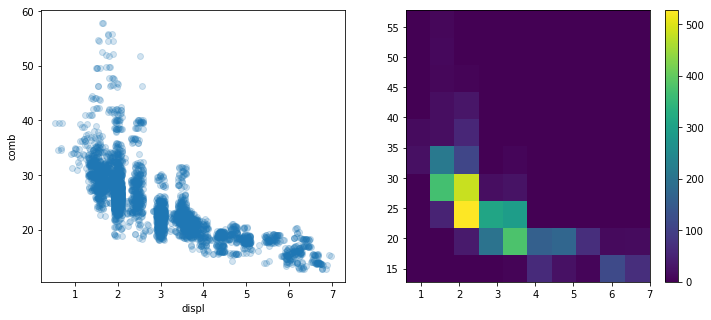

In [11]:
plt.figure(figsize=[12,5],frameon=True)
plt.subplot(1,2,1)

sns.regplot(data=fuel_eco,x="displ",y="comb",fit_reg=False,
           x_jitter=0.1,y_jitter=0.1,scatter_kws={"alpha":1/5})

plt.subplot(1,2,2)
# bins_x = np.arange(-0.5,10.5+1, 1)
# bins_y = np.arange(-0.5,10.5+1, 1)
plt.hist2d(data=fuel_eco,x="displ",y="comb")#,bins=[bins_x,bins_y])
plt.colorbar();



As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Heatmaps can also be used as 2-d versions of bar charts, plotting counts on combinations of two categorical variables instead of numeric variables. There is a function in seaborn, heatmap, that is built for categorical heatmaps. 

### Additional Variations
To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to further . For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

In [12]:
# first decide what might be the bins size

fuel_eco[["displ","comb"]].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


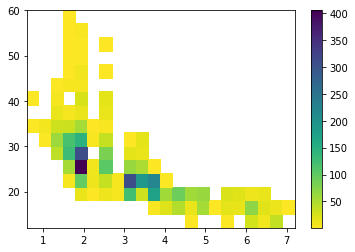

In [13]:
bins_x = np.arange(0.6,7+0.3,0.3)  # decided from above statistics
bins_y = np.arange(12,58+3,3)
plt.hist2d(data=fuel_eco,x="displ",y="comb",cmin=0.5,cmap = "viridis_r",bins=[bins_x,bins_y])
plt.colorbar();

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

In [14]:
# h2d = plt.hist2d(data=fuel_eco,x="displ",y="comb",cmin=0.5,cmap = "viridis_r");

# counts = h2d[0];

# bins_x = np.arange(0.6,7+0.3,0.3)  # decided from above statistics
# bins_y = np.arange(12,58+3,3)

# for i in range(counts.shape[0]):
#     for j in range(counts.shape[1]):
#         c = counts[i,j];
#         if c>0:
#             plt.text(bins_x[i]+0.5, bins_y[j]+0.5,int(c),
#                      ha = 'center', va = 'center');


If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap function for just that, as will be seen later.

### Violin Plots
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's violinplot function can be used to create violin plots combined with box plots – we'll discuss box plots on the next page.

In [15]:
sedan_class = ['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars','Minicompact Cars']

vclass = pd.api.types.CategoricalDtype(ordered=True,categories=sedan_class)
vclass

fuel_eco["VClass"] = fuel_eco["VClass"].astype(vclass) # converting from a plain object type to categorical type of order size

CategoricalDtype(categories=['Subcompact Cars', 'Compact Cars', 'Midsize Cars',
                  'Large Cars', 'Minicompact Cars'],
                 ordered=True)

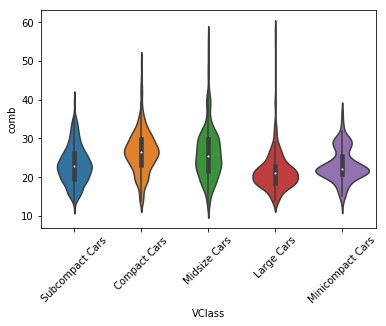

In [16]:
sns.violinplot(data=fuel_eco,x="VClass",y="comb")
plt.xticks(rotation=45);

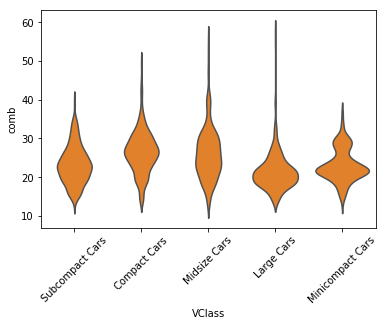

In [17]:
base_color = sns.color_palette()[1]
sns.violinplot(data=fuel_eco,x="VClass",y="comb",
               inner=None,color=base_color) # inner boxplor can be turn-off by setting inner=None
plt.xticks(rotation=45);

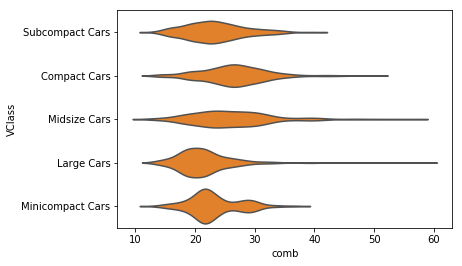

In [18]:
base_color = sns.color_palette()[1]
sns.violinplot(data=fuel_eco,y="VClass",x="comb",
               inner=None,color=base_color) ;

In [19]:
fuel_eco.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

### Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot function.

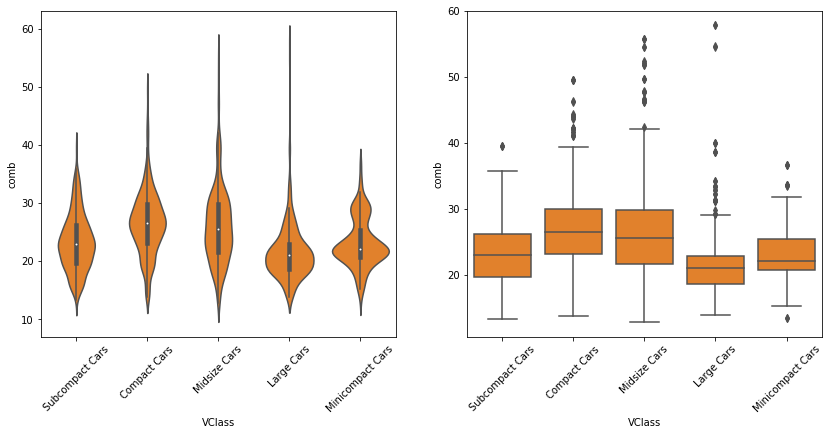

In [41]:
plt.figure(figsize=[14,6])

base_color = sns.color_palette()[1]
plt.subplot(1,2,1)

sns.violinplot(data=fuel_eco,x="VClass",y="comb",color= base_color)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.boxplot(data=fuel_eco,x="VClass",y="comb",color=base_color)
plt.xticks(rotation=45);


### Okay to make above two plots more comparable
Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot is assigned to a variable, ax1 is used to programmatically obtain those limit values.

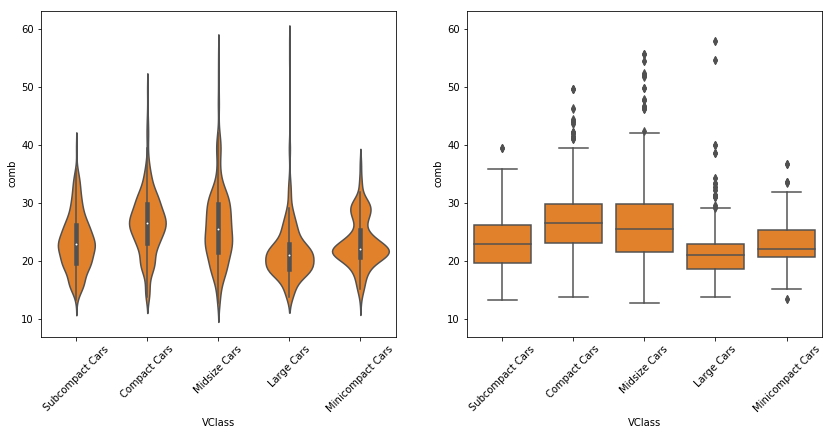

In [42]:
plt.figure(figsize=[14,6])

base_color = sns.color_palette()[1]
plt.subplot(1,2,1)

ax=sns.violinplot(data=fuel_eco,x="VClass",y="comb",color= base_color)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.boxplot(data=fuel_eco,x="VClass",y="comb",color=base_color)
plt.xticks(rotation=45)
plt.ylim(ax.get_ylim());

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. 

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

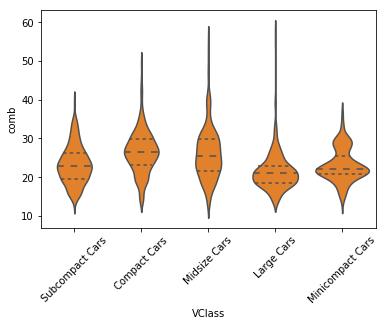

In [44]:
sns.violinplot(data=fuel_eco,x="VClass",y="comb",color= base_color,inner="quartile")
plt.xticks(rotation=45);

### Clustered Bar Charts
To depict the relationship between two categorical variables. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

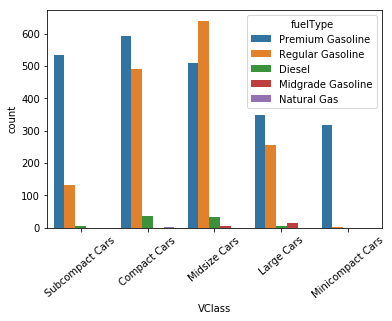

In [52]:
sns.countplot(data=fuel_eco,x="VClass",hue="fuelType")
plt.xticks(rotation = 40);

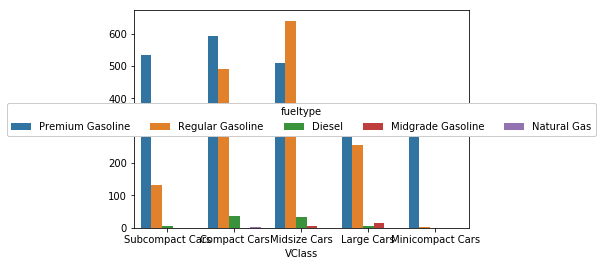

In [55]:
# in case you want to change legend position
# just a demo!!!

ax = sns.countplot(data=fuel_eco,x="VClass",hue="fuelType")
ax.legend(loc=10,ncol=5,framealpha=1,title="fueltype");

### Alternative Approach (Heat Map)
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. The seaborn function heatmap is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [76]:
ct_counts = fuel_eco.groupby(["VClass","fuelType"]).size()  # still a series
ct_counts = ct_counts.reset_index(name="count") # dataframe
ct_counts = ct_counts.pivot_table(values="count",index="VClass",columns="fuelType")

ct_counts

fuelType,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
VClass,,,,,
Subcompact Cars,7.0,NaN,NaN,534.0,132.0
Compact Cars,36.0,NaN,3.0,593.0,490.0
Midsize Cars,32.0,7.0,NaN,509.0,640.0
Large Cars,5.0,16.0,NaN,348.0,256.0
Minicompact Cars,NaN,NaN,NaN,318.0,3.0


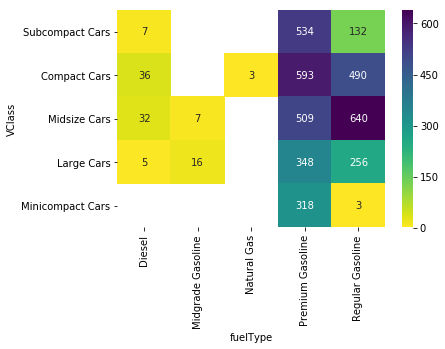

In [88]:
sns.heatmap(ct_counts,annot=True,fmt=".0f",vmin=1,cmap = "viridis_r"); # cmap just for colors!!!

annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding fmt = 'd' means that annotations will all be formatted as integers instead. You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.



### Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "comb").


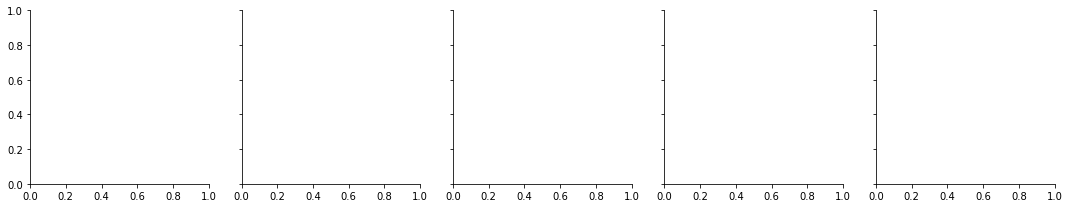

In [119]:
g = sns.FacetGrid(data=fuel_eco,col="VClass")  # there are 5 levels in VClass,hence 5 grid below

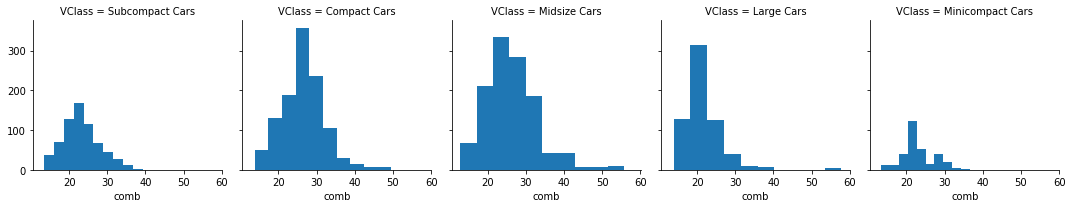

In [120]:
g =  sns.FacetGrid(data=fuel_eco,col="VClass")
g.map(plt.hist,"comb");

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "num_var", or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

In [107]:
fuel_eco.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

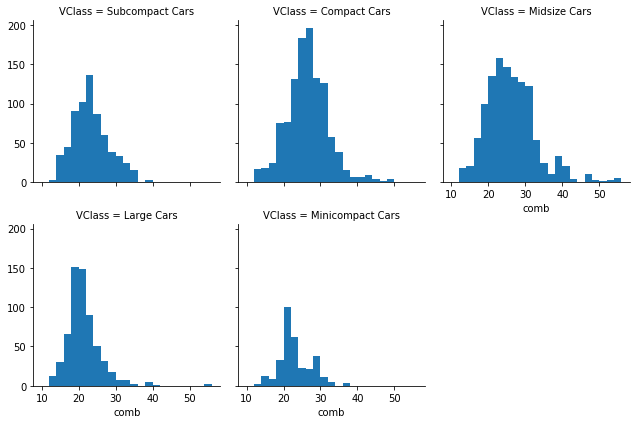

In [116]:
bins = np.arange(10,58,2)
g = sns.FacetGrid(data=fuel_eco,col="VClass",col_wrap=3) # add col_wrap - limiting # of columns in grid,helpfull when lot of levels to compare
g.map(plt.hist,"comb",bins=bins); # adding bins number

Attention, look if we dont have same axis as given below, this might be misleading in interpretation as
each VClass` levels have their own y-axis and looks similar. 

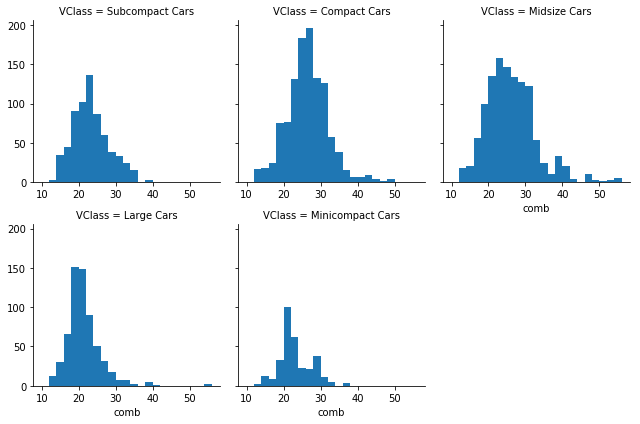

In [118]:
g = sns.FacetGrid(data=fuel_eco,col="VClass",col_wrap=3,sharex=False) 
g.map(plt.hist,"comb",bins=bins);

In [45]:
fuel_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
id           3929 non-null int64
make         3929 non-null object
model        3929 non-null object
year         3929 non-null int64
VClass       3929 non-null category
drive        3929 non-null object
trans        3929 non-null object
fuelType     3929 non-null object
cylinders    3929 non-null int64
displ        3929 non-null float64
pv2          3929 non-null int64
pv4          3929 non-null int64
city         3929 non-null float64
UCity        3929 non-null float64
highway      3929 non-null float64
UHighway     3929 non-null float64
comb         3929 non-null float64
co2          3929 non-null int64
feScore      3929 non-null int64
ghgScore     3929 non-null int64
dtypes: category(1), float64(6), int64(8), object(5)
memory usage: 587.3+ KB
